# Cats vs Dogs - Deep Learning

## 1. Data Preprocessing and Visualisation

In [1]:
# !pip install opencv-python
# !apt update && apt install -y libsm6 libxext6
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
%matplotlib inline

#### Global Variables:

In [11]:
path_to_data = "data/train/dog/"
img_list = os.listdir(path_to_data)

#### Let us visualise a random picture from the training set

In [12]:
print (img_list[0])

dog.365.jpg


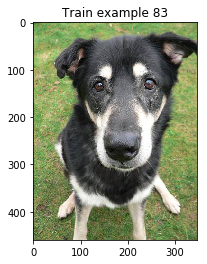

(460, 346, 3)


In [13]:
n = np.random.randint(0,100)
img = plt.imread(path_to_data+img_list[n])

plt.figure()
plt.title("Train example %d"%n)
plt.imshow(img)
plt.show()

print (img.shape)

#### An overview of the data we are dealing with:

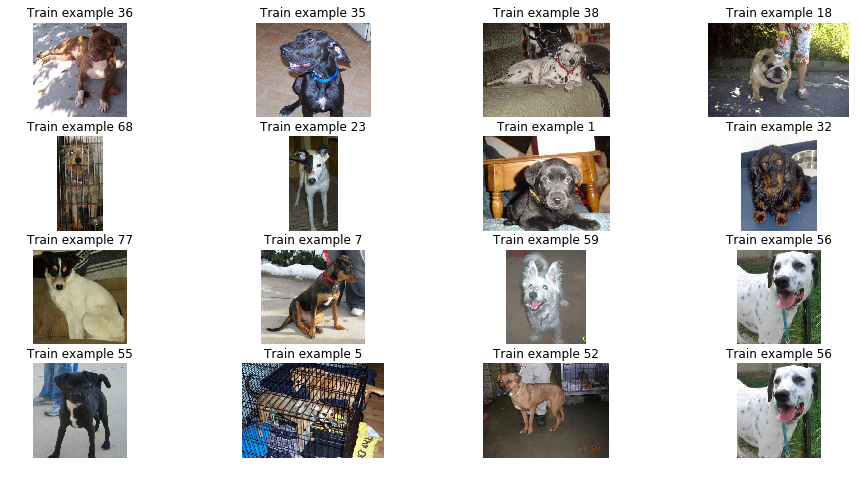

In [14]:
n = np.random.randint(0,100,16)

plt.figure(figsize=(16,8))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.title("Train example %d"%n[i])
    img = plt.imread(path_to_data+img_list[n[i]])
    plt.axis("off")
    plt.imshow(img)
plt.show()

### Image Stats 

In [15]:
width_histogram = []
height_histogram = []
i = 0
for name in img_list:
    img = plt.imread(path_to_data+name)
    width_histogram.append(img.shape[1])
    height_histogram.append(img.shape[0])
    print ("\r%d"%i), 
    i += 1

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [16]:
print ("Mean width :", np.mean(width_histogram))
print ("Mean height :", np.mean(height_histogram))

Mean width : 397.90584878744653
Mean height : 363.8459343794579


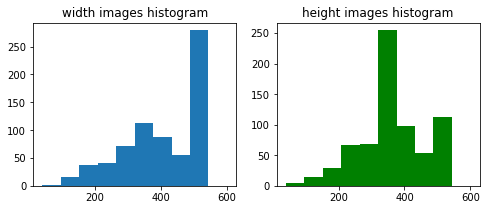

Mean width : 397.90584878744653
Mean height : 363.8459343794579


In [17]:
plt.figure(figsize=(8,3))
plt.subplot(1,2,1)
plt.title("width images histogram")
plt.hist(width_histogram, range=(40,600))
plt.subplot(1,2,2)
plt.title("height images histogram")
plt.hist(height_histogram, range=(40,600), color="g")
plt.show()

print ("Mean width :", np.mean(width_histogram))
print ("Mean height :", np.mean(height_histogram))

## Data manipulation

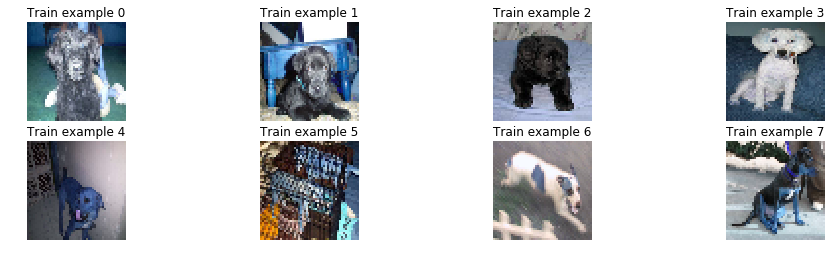

In [47]:
sz = (50,50)
plt.figure(figsize=(16,4))
for i in range(8):
    plt.subplot(2,4,i+1)
    plt.title("Train example %d"%i)
    img = cv2.imread(path_to_data+img_list[i])
    b,g,r = cv2.split(img)
    resized_img1 = cv2.resize(b, sz)
    resized_img2 = cv2.resize(g, sz)
    resized_img3 = cv2.resize(r, sz)
    resized_img = cv2.merge((resized_img1,resized_img2,resized_img3))
    plt.axis("off")
    plt.imshow(resized_img)
plt.show()

In [51]:
import PIL

def remove_black_borders_from_rotation(rotated_img, deg):
    
    if deg<0:
        out = remove_black_borders_from_rotation(rotated_img[:,::-1], -deg)
        return out[:,::-1]
    
    row, col = rotated_img.shape

    first_row = rotated_img[0]
    first_col = rotated_img[:,0]

    cropx = np.argwhere(np.cumsum(first_row[::-1]!=0)==1)[0][0]
    cropy = np.argwhere(np.cumsum(first_col!=0)==1)[0][0]
    
    return rotated_img[cropy:(row-cropy), cropx:(col-cropx)]

def remove_black_borders_from_translation(translated_img, tx, ty):
    
    row, col = translated_img.shape
    
    left = max(0,tx)
    right = min(col,col+tx)
    up = max(0,ty)
    down = min(row,row+ty)
    
    return translated_img[up:down, left:right]

def rotate(img, angle):
    # if img.ndim > 2:
    #     print "Rotate only works for gray image."
    # rows,cols = img.shape
    # M = cv2.getRotationMatrix2D((cols/2,rows/2), angle, 1)
    # return cv2.warpAffine(img, M,(cols,rows))
    pil_img = PIL.Image.fromarray(img)
    return np.array(pil_img.rotate(angle), dtype=img.dtype)

def crop(img, crop_rates):
    rows,cols = img.shape
    crop_up, crop_down, crop_left, crop_right = crop_rates
    crop_up = int(crop_up*rows/100.0)
    crop_down = int(crop_down*rows/100.0)
    crop_left = int(crop_left*rows/100.0)
    crop_right = int(crop_right*rows/100.0)
    return img[crop_up:(rows-crop_down),crop_left:(cols-crop_right)]

def resize_and_scale(img, size, scale):
    img = cv2.resize(img, size)
    return np.array(img, "float32")/scale

In [52]:
def rotate_crop_and_scale(img, final_size, max_angle, max_crop_rate, scale):
    # Random Rotation
    angle = np.random.randint(-max_angle,max_angle)
    # Random Crop
    crop_rates = np.random.randint(0, max_crop_rate, 4) # translation rates
    
    b,g,r = cv2.split(img)
    resized_channels = []
    rotated_channels = []
    cropped_channels = []
    cropped_rotated_channels = []
    for img_channel in [b,g,r]:
        rotated_img = rotate(img_channel, angle)
        rotated_channels.append(rotated_img)

        # Remove black borders
        cropped_rotated_img = remove_black_borders_from_rotation(rotated_img, angle)
        cropped_rotated_channels.append(cropped_rotated_img)
        cropped_img = crop(cropped_rotated_img, crop_rates)
        cropped_channels.append(cropped_img)
        # Resize and scale
        resized_img = resize_and_scale(cropped_img, final_size, scale)
        resized_channels.append(resized_img)
    
#     rotated_img = cv2.merge((rotated_channels[0],rotated_channels[1],rotated_channels[2]))
#     cropped_rotated_img = cv2.merge((cropped_rotated_channels[0],cropped_rotated_channels[1],cropped_rotated_channels[2]))
#     cropped_img = cv2.merge((cropped_channels[0],cropped_channels[1],cropped_channels[2]))
    resized_img = cv2.merge((resized_channels[0],resized_channels[1],resized_channels[2]))
    # Flip left right
    
    if np.random.randint(0,2)==1:
        resized_img = np.fliplr(resized_img)
    output_img = resized_img
    # Return
    return output_img, cropped_img, cropped_rotated_img, rotated_img, angle
#    return output_img

def display_process(str_file, sz=(50,50)): 
    img = cv2.imread(str_file)
    output_img, cropped_im, cropped_rotated_img, rotated_img, angle = rotate_crop_and_scale(img, sz, 10, 10, 255.0)
    # DISPLAY
    plt.figure(figsize=(16,10))
    plt.subplot(2,3,1)
    plt.axis("off")
    plt.title("Raw (%dx%d)"%(img.shape[0],img.shape[1]))
    plt.imshow(img, interpolation="nearest")
    plt.subplot(2,3,2)
    plt.axis("off")
    plt.title("Rotated (%d deg)"%angle)
    plt.imshow(rotated_img, interpolation="nearest")
    plt.subplot(2,3,3)
    plt.axis("off")
    plt.title("Without black border")
    plt.imshow(cropped_rotated_img, interpolation="nearest")
    plt.subplot(2,3,4)
    plt.axis("off")
    plt.title("Random crop")
    plt.imshow(cropped_im, interpolation="nearest")
    plt.subplot(2,3,5)
    plt.axis("off")
    plt.title("Final image")
    plt.imshow(output_img, interpolation="nearest")
    plt.show()

In [53]:
def preprocess(str_file, sz=(50,50)):
    try:
        img = cv2.imread(str_file)
        output_img, cropped_img, cropped_rotated_img, rotated_img, angle = rotate_crop_and_scale(img, sz, 10, 10, 255.0)
        return output_img
    except Exception as e:
        raise str(e)

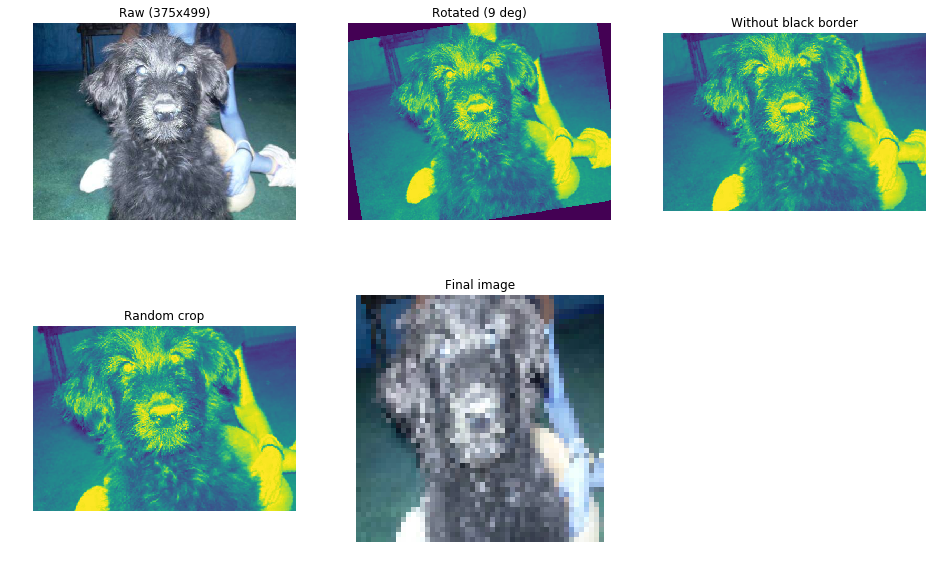

In [54]:
n = np.random.randint(0,100,1)[0]
display_process(path_to_data+img_list[0], sz=(50,50))

## Split Data - Training and Validation Set

In [55]:
np.random.seed(123456)
index = np.arange(0,700,1)
np.random.shuffle(index)

In [62]:
img_list = np.array(img_list)
train_list = img_list[index[0:650]]
valid_list = img_list[index[650:700]]

# Targets
targets = np.zeros((700,2))
targets[0:650,0]=1.0
targets[650:700,1]=1.0
train_targets = targets[index[0:650]]
valid_targets = targets[index[650:700]]

### Storing the Training Set

In [64]:
final_size = (50,50)
# Instantiate train data
train_data = np.zeros((700, final_size[0], final_size[1], 3), dtype="float32")
# Fill it
for i, name in enumerate(train_list):
    train_example = preprocess(path_to_data+name, final_size)
    train_data[i] = train_example
    print ("\r%d examples processed"%(i+1))

1 examples processed
2 examples processed
3 examples processed
4 examples processed
5 examples processed
6 examples processed
7 examples processed
8 examples processed
9 examples processed
10 examples processed
11 examples processed
12 examples processed
13 examples processed
14 examples processed
15 examples processed
16 examples processed
17 examples processed
18 examples processed
19 examples processed
20 examples processed
21 examples processed
22 examples processed
23 examples processed
24 examples processed
25 examples processed
26 examples processed
27 examples processed
28 examples processed
29 examples processed
30 examples processed
31 examples processed
32 examples processed
33 examples processed
34 examples processed
35 examples processed
36 examples processed
37 examples processed
38 examples processed
39 examples processed
40 examples processed
41 examples processed
42 examples processed
43 examples processed
44 examples processed
45 examples processed
46 examples process

372 examples processed
373 examples processed
374 examples processed
375 examples processed
376 examples processed
377 examples processed
378 examples processed
379 examples processed
380 examples processed
381 examples processed
382 examples processed
383 examples processed
384 examples processed
385 examples processed
386 examples processed
387 examples processed
388 examples processed
389 examples processed
390 examples processed
391 examples processed
392 examples processed
393 examples processed
394 examples processed
395 examples processed
396 examples processed
397 examples processed
398 examples processed
399 examples processed
400 examples processed
401 examples processed
402 examples processed
403 examples processed
404 examples processed
405 examples processed
406 examples processed
407 examples processed
408 examples processed
409 examples processed
410 examples processed
411 examples processed
412 examples processed
413 examples processed
414 examples processed
415 example

In [65]:
import _pickle as cPickle
description = "Training data. Rotation : +- 10 deg. Translation rate : +-15. Norm : (x - mean(x))/128.0"
with open('data/train_data_2018_07_18.pkl', 'wb') as f:
    cPickle.dump(train_data, f)
    cPickle.dump(description, f)

In [66]:
description = "Training labels.[1 0]- cats, [0 1]- dogs"
with open('data/train_labels_2018_07_18.pkl', 'wb') as f:
    cPickle.dump(train_targets, f)
    cPickle.dump(description, f)

In [68]:
valid_data = np.zeros((50, final_size[0], final_size[1], 3), dtype="float32")
# Fill it
for i, name in enumerate(valid_list):
    try:
        valid_example = preprocess(path_to_data+str(name), final_size)
        valid_data[i] = valid_example
        print ("\r%d examples processed"%(i+1))
    except Exception as e:
        print(e)

1 examples processed
2 examples processed
3 examples processed
4 examples processed
5 examples processed
6 examples processed
7 examples processed
8 examples processed
9 examples processed
10 examples processed
11 examples processed
12 examples processed
13 examples processed
14 examples processed
15 examples processed
16 examples processed
17 examples processed
18 examples processed
19 examples processed
20 examples processed
21 examples processed
22 examples processed
23 examples processed
24 examples processed
25 examples processed
26 examples processed
27 examples processed
28 examples processed
29 examples processed
30 examples processed
31 examples processed
32 examples processed
33 examples processed
34 examples processed
35 examples processed
36 examples processed
37 examples processed
38 examples processed
39 examples processed
40 examples processed
41 examples processed
42 examples processed
43 examples processed
44 examples processed
45 examples processed
46 examples process

In [69]:
description = "Valid data. Rotation : +- 10 deg. Translation rate : +-15. Norm : (x - mean(x))/128.0"
with open('data/valid_data_2018_07_18.pkl', 'wb') as f:
    cPickle.dump(valid_data, f)
    cPickle.dump(description, f)

In [70]:
description = "Validation labels.[1 0]- cats, [0 1]- dogs"
with open('data/valid_labels_2018_07_18.pkl', 'wb') as f:
    cPickle.dump(valid_targets, f)
    cPickle.dump(description, f)

In [71]:
with open('data/valid_data_2018_07_18.pkl', 'rb') as f:
    valid_data = cPickle.load(f)

In [72]:
with open('data/valid_labels_2018_07_18.pkl', 'rb') as f:
    valid_labels = cPickle.load(f)    

(50, 50, 50, 3)


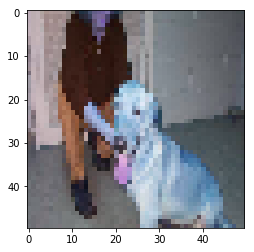

[1. 0.]


In [73]:
print(valid_data.shape)
plt.imshow(valid_data[4])
plt.show()
print(valid_labels[4])